In [1]:
import numpy as np
import aurora.autodiff as ad
import aurora.datasets as data
from aurora.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sbn;
sbn.set()

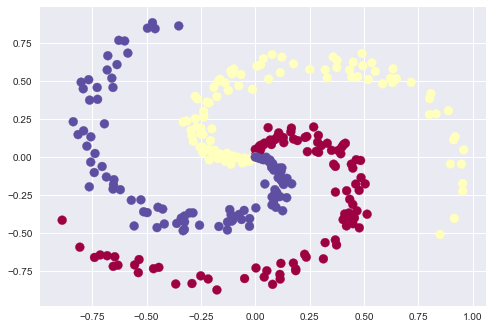

In [3]:
D = 2
H = 150
K = 3
N = 100

X_data, y_data, y_data_encoded = data.spiral(K, D, N, 0)

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=80, cmap=plt.cm.Spectral)
plt.show()

iter:     0 cost:  1.09859
iter:     1 cost:  1.09847
iter:     2 cost:  1.09826
iter:     3 cost:  1.09800
iter:     4 cost:  1.09770
iter:     5 cost:  1.09735
iter:     6 cost:  1.09694
iter:     7 cost:  1.09646
iter:     8 cost:  1.09589
iter:     9 cost:  1.09520
iter:    10 cost:  1.09436
iter:    20 cost:  1.06450
iter:    30 cost:  0.91369
iter:    40 cost:  0.75943
iter:    50 cost:  0.73692
iter:    60 cost:  0.72528
iter:    70 cost:  0.71483
iter:    80 cost:  0.70418
iter:    90 cost:  0.69313
iter:   100 cost:  0.68098
iter:   200 cost:  0.45676
iter:   300 cost:  0.29426
iter:   400 cost:  0.22078
iter:   500 cost:  0.15874
iter:   600 cost:  0.11799
iter:   700 cost:  0.09537
iter:   800 cost:  0.08031
iter:   900 cost:  0.06986
iter:  1000 cost:  0.06224
Prediction accuracy: 99.000%


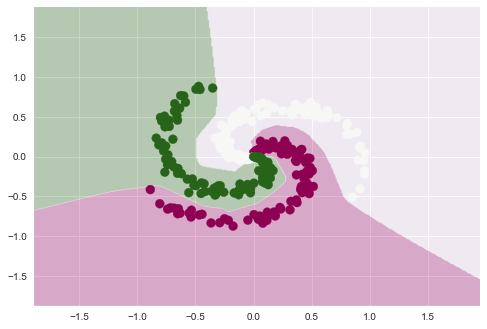

In [10]:
X = ad.Variable(name="X")
y = ad.Variable(name='y')

W1 = ad.Parameter(name="W1", init=0.01 * np.random.randn(D, H))
b1 = ad.Parameter(name="b1", init=np.zeros(H))

W2 = ad.Parameter(name="W2", init=0.01 * np.random.randn(H, K))
b2 = ad.Parameter(name="b2", init=np.zeros(K))

z1 = ad.matmul(X, W1)
hidden_1 = z1 + ad.broadcast_to(b1, z1)
activation_1 = ad.relu(hidden_1)

z2 = ad.matmul(activation_1, W2)
hidden_2 = z2 + ad.broadcast_to(b2, z2)
loss = ad.cross_entropy(hidden_2, y)

lr = 1e-3
n_epoch = 1001
optimizer = SGD(loss, params=[W1, b1, W2, b2], lr=lr, momentum=0.8)
for i in range(n_epoch):
    loss_now = optimizer.step(feed_dict={X: X_data, y: y_data_encoded})
    if i <= 10 or (i <= 100 and i % 10 == 0) or (i <= 1000 and i % 100 == 0):
        fmt_str = 'iter: {0:>5d} cost: {1:>8.5f}'
        print(fmt_str.format(i, loss_now[0]))

prob = ad.softmax(hidden_2)
executor = ad.Executor([prob])
prob_values, = executor.run(feed_dict={X: X_data})

correct = np.sum(np.equal(y_data, np.argmax(prob_values, axis=1)))
print('Prediction accuracy: {0:>.3f}%'.format((correct / (N * K)) * 100.00))

size = 0.01
x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, size), np.arange(y_min, y_max, size))
Z = np.stack((xx.ravel(), yy.ravel()), axis=1)

prob_values, = executor.run(feed_dict={X: Z})

Z = np.argmax(prob_values, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.PiYG, alpha=0.3, antialiased=True)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=80, cmap=plt.cm.PiYG)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()